In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

# Read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix , classification_report 

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train"
test_dir = "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test"

In [4]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 20
CLASS_LABELS  = ['NORMAL', 'PNEUMONIA']
NUM_CLASSES = 2

In [5]:
# Data generators
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1, 
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# Build Model CNN

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [8]:
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))  ## drop 25% neurons (stop)

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

# Compile CNN

In [9]:
model.compile(
    optimizer=  Adam() , # Adam(learning_rate=0.001), # 'adam'
    loss='categorical_crossentropy',  # encoding y : datagenerator : encode y
    metrics=['accuracy']
)

# Train the Model 

In [10]:
# Train the model
history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5460 - loss: 0.6995 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4295 - loss: 0.7349 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5353 - loss: 0.6874 - val_accuracy: 0.7500 - val_loss: 0.6901
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5281 - loss: 0.6853 - val_accuracy: 0.6071 - val_loss: 0.6888
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4830 - loss: 0.6951 - val_accuracy: 0.5357 - val_loss: 0.6848
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5927 - loss: 0.6800 - val_accuracy: 0.7500 - val_loss: 0.6824
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6476 - loss: 0.6665 - val_accuracy: 0.6786 - val_loss: 0.6743
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5778 - loss: 0.6522 - val_accuracy: 0.5714 - val_loss: 0.6600
Epoch 9/20
2/2 

# Data drawing

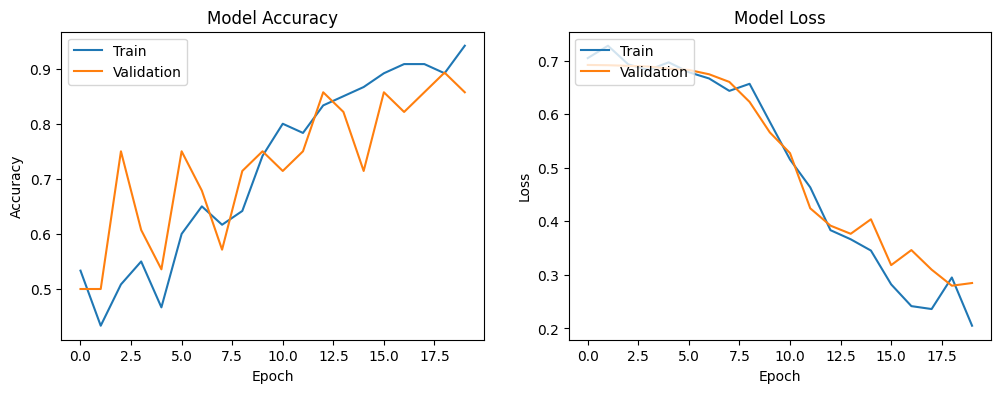

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()


# Plot the training history
plot_training_history(history)


# Transfomer Traning VGG16 Model 

In [12]:
from keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

In [13]:
# Load the pre-trained VGG16 model without the top classification layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the VGG16 base layers (these won't be trained)
vgg_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Build Model VGG16

In [14]:
# Build the Sequential model
model2 = Sequential()

# Add the pre-trained VGG16 base model | extract features only
model2.add(vgg_base)

# Add a pooling layer to reduce the output from the VGG model (either Flatten or GlobalAveragePooling)
model2.add(GlobalAveragePooling2D()) ## GlobalAveragePooling2D = CNN  |  Flatten

# Add Dense layers on top for the new classification task
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=64, activation='relu'))

# Output layer for 7 classes (adjust the number based on your dataset)
model2.add(Dense(units=2, activation='softmax'))

# Compile VGG16

In [15]:
# Compile the model
model2.compile(optimizer=Adam(), loss='BinaryCrossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5905 - loss: 0.6749 - val_accuracy: 0.7857 - val_loss: 0.6241
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7285 - loss: 0.6351 - val_accuracy: 0.9643 - val_loss: 0.5832
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8101 - loss: 0.5885 - val_accuracy: 0.9286 - val_loss: 0.5455
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8528 - loss: 0.5477 - val_accuracy: 0.8571 - val_loss: 0.5116
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8903 - loss: 0.4931 - val_accuracy: 0.8571 - val_loss: 0.4756
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8405 - loss: 0.4622 - val_accuracy: 0.9643 - val_loss: 0.4289
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8345 - loss: 0.4367 - val_accuracy: 0.9643 - val_loss: 0.3903
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8631 - loss: 0.4108 - val_accuracy: 0.9643 - val_loss: 0.3518
Epoch 9/20
2

# Data drawing VGG16

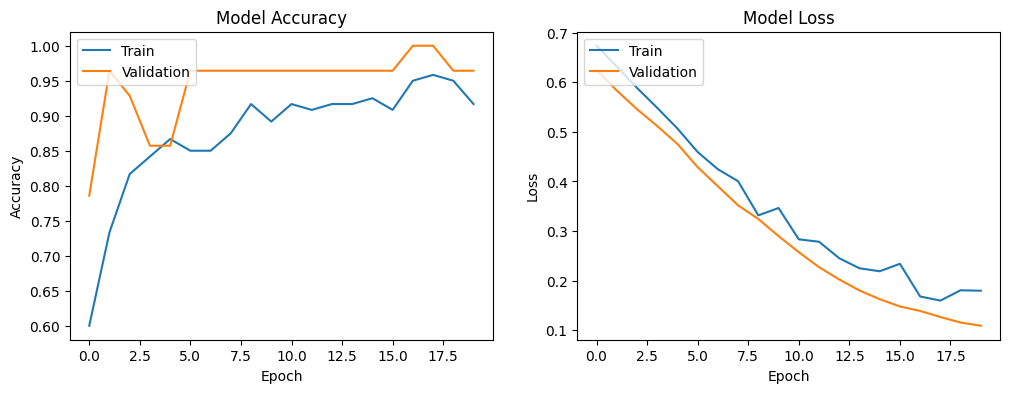

In [16]:
# Plot training accuracy and loss
plot_training_history(history2)

# Save Model 

In [17]:
# save model 
model2.save('my_model.h5')

# Transfer learning ResNet

In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained ResNet50 model without the top classification layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the ResNet50 base layers (these won't be trained)
resnet_base.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Build ResNet Model 

In [19]:
# Build the Sequential model
model3 = Sequential()

# Add the pre-trained ResNet50 base model | extract features only
model3.add(resnet_base)

# Add a pooling layer to reduce the output from the ResNet50 model (either Flatten or GlobalAveragePooling)
model3.add(GlobalAveragePooling2D()) ## GlobalAveragePooling2D = CNN  |  Flatten

# Add Dense layers on top for the new classification task
model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(units=64, activation='relu'))

# Output layer for 2 classes (adjust the number based on your dataset)
model3.add(Dense(units=2, activation='softmax'))

# Compile ResNet

In [20]:
# Compile the model
model3.compile(optimizer=Adam(), loss='BinaryCrossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5267 - loss: 0.7562 - val_accuracy: 0.5000 - val_loss: 0.7302
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5427 - loss: 0.7230 - val_accuracy: 0.5357 - val_loss: 0.6779
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5962 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5119 - loss: 0.7062 - val_accuracy: 0.7857 - val_loss: 0.6642
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5917 - loss: 0.6964 - val_accuracy: 0.7500 - val_loss: 0.6495
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6462 - loss: 0.6656 - val_accuracy: 0.5714 - val_loss: 0.6514
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5660 - loss: 0.6903 - val_accuracy: 0.8929 - val_loss: 0.6332
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6243 - loss: 0.6673 - val_accuracy: 0.8929 - val_loss: 0.6191
Epoch 9/20
2/2 

# Data drawing ResNet

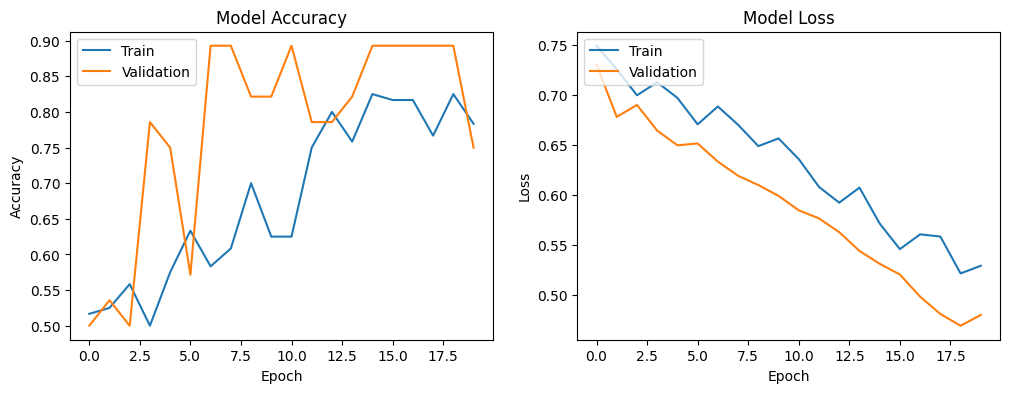

In [21]:
# Plot training accuracy and loss
plot_training_history(history3)

# Transfer learning DenseNet

In [22]:
from tensorflow.keras.applications import DenseNet121  # we can use any version like  DenseNet169 or DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained DenseNet model without the top classification layers
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the DenseNet base layers (these won't be trained)
densenet_base.trainable = False


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Build DenseNet 

In [23]:
# Build the Sequential model
model4 = Sequential()

# Add the pre-trained DenseNet121 base model | extract features only
model4.add(densenet_base)

# Add a pooling layer to reduce the output from the DenseNet121 model
model4.add(GlobalAveragePooling2D())  # You can also use Flatten() here

# Add Dense layers on top for the new classification task
model4.add(Dense(units=128, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(units=64, activation='relu'))

# Output layer for 2 classes (adjust the number based on your dataset)
model4.add(Dense(units=2, activation='softmax'))

# Compile DenseNet

In [24]:
# Compile the model
model4.compile(optimizer=Adam(), loss='BinaryCrossentropy', metrics=['accuracy'])

# Train the model
history4 = model4.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.4710 - loss: 0.7822 - val_accuracy: 0.7143 - val_loss: 0.6145
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6802 - loss: 0.6319 - val_accuracy: 0.7500 - val_loss: 0.5435
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8687 - loss: 0.4861 - val_accuracy: 0.8929 - val_loss: 0.5019
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8538 - loss: 0.4419 - val_accuracy: 0.8571 - val_loss: 0.4661
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9021 - loss: 0.3646 - val_accuracy: 0.8929 - val_loss: 0.4091
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9492 - loss: 0.2842 - val_accuracy: 0.8571 - val_loss: 0.3715
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9076 - loss: 0.2890 - val_accuracy: 0.8571 - val_loss: 0.3403
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9455 - loss: 0.2330 - val_accuracy: 0.8571 - val_loss: 0.3152
Epoch 9/20
2/2 

# Data Drawing 

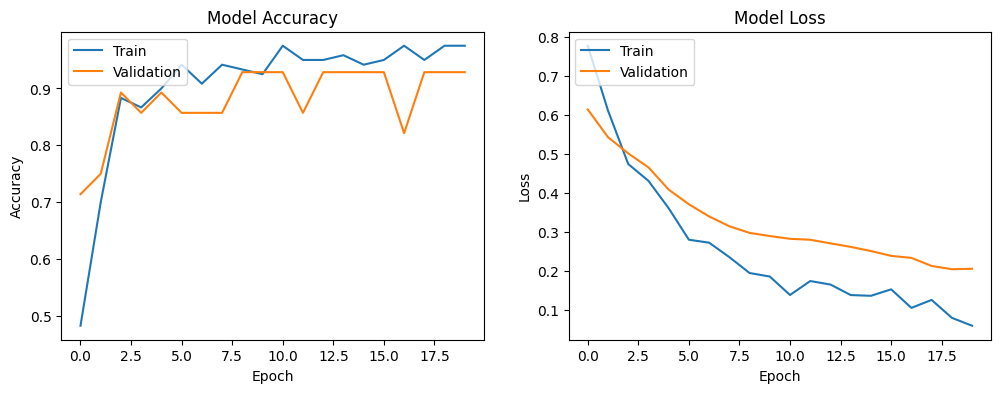

In [25]:
# Plot training accuracy and loss
plot_training_history(history4)